### V03_Assignment_4_Instructions _Update

Note V03: (24 Nov 2021) --- YADAV

                Applied Roots evaluation has to be done ----YADAV(24 NOV 2021)
   1. In order to see the simplyfied code and with all the print statements refer V02_Assignment_4_Instructions
   2. In this also, it is possible but the data valuse are more, which coded to meet applied roots assignment requiremnts. However, in order to update the vesion (V03) you can free to modify it.  
   
   
                                           ------YADAV
   




Note V02_Assignment_4_Instructions: (24 NOV 2021)  --- YADAV
1. In this version, the assignment has been coded with necessary comments 
2. Also, there are many drafts includes, which will be obsolate in next version (V03)
3. hyper parameter vs accuracy plots and decision boundaries are coded 
4. The draft version includes,few referces such as random.sample, accuracy function etc., 
5. The data size and random numbers(k) values are considered 100 and 3 respectively in this version. 
6. The next version(V03) will have the data size=10000 and random number =10 according to the applied roots requirements. 



Note V01_Assignment_4_Instructions: (23 NOV 2021)  --- YADAV
1. In this, just followed the assignment instructions, nothing has been modified
2. The next version(V02) in the assignment, going to work with kaggle reference 





# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score

In [3]:

#random_state
"""
train_test_split function splits arrays or matrices into random train and test subsets.
That means that everytime you run it without specifying random_state, you will 
get a different result.

It doesn't matter what the actual random_state number is 42, 0, 21, ... 
The important thing is that everytime you use 42, you will always get the same output
the first time you make the split. 
"""
#https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

x,y=make_classification(n_samples=10000,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=52)
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=4)

print("length of samples(x): ",len(x))

print("length of training samples(X_train): ",len(X_train))
#print(X_train)

print("length of test samples(X_test): ",len(X_test))
#print(X_test)

print("\nlength of samples(y): ",len(y))
#print("y_test: ",y_train)
print("length of training samples(y_train): ",len(y_train))
print("y_train: ",y_test)
print("length of test samples(y_test): ",len(y_test))


length of samples(x):  10000
length of training samples(X_train):  7500
length of test samples(X_test):  2500

length of samples(y):  10000
length of training samples(y_train):  7500
y_train:  [0 1 1 ... 0 1 0]
length of test samples(y_test):  2500


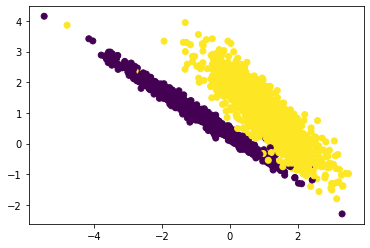

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#%colors={0:"oragne",1:"green"} # check it later, the cmd is not working properly 

plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()


## Implementing Custom GridSearchCV

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
from tqdm import tqdm


In [6]:

# https://www.kaggle.com/bhushanyadav07/implementing-custom-randomsearchcv/notebook
"""
# this functions is not working, since the return statement not giving the values 
def random_params(params_range):
    Z=random.sample(range(1,params_range),10) # generating 10 random values
    Z=Z.sort() # the generated random values, keeping in ascending order
    return Z
"""
def random_params(params_range): # defining random_params function
    sort_values = random.sample(range(1, params_range),10) # generating 10 random unique values in the given range 
    sort_values.sort() # sorting the generated random values in ascending order
    return sort_values  # returing the sorted values

#random.sample creates a list type values # for ex: random.sample(range(0, 50), 10)



def RandomSearchCV(x_train,y_train,classifier,params,folds): # defining the RandomSearchCV function 
    trainscores=[]
    testscores=[]
    

    #params list of randomly selected range
    params_list=random_params(params_range)
    #print("params_list: ",params_list) #printing random params_list

    params={"n_neighbors":params_list} # storing in dict as key : values
    
    for k in (params["n_neighbors"]): #definng of k values
        trainscore_folds=[] 
        testscore_folds=[]
        
        for j in range(0,folds): #folds=[1,2,3]
            
            values=(len(x_train))/(folds) #equal division of entire training data using folds
            #print("values: ",values)
            
            #float values limitation
            #https://www.kite.com/python/answers/how-to-limit-a-float-to-two-decimal-places-in-python
            #print("\nvalues when fold j=%d x_train lenth %.2f and params(k)=%d " %(j,values,k)) 
            
            boundary=int(values) #keeping the values(x_train equal parts) in int format
            #print('\n boundary when j = %d is %d' % (j, boundary)) # printing 
        
            #this will create a range #for ex: a=list(set(list(range(0,10))))
            test_indices=list(set(list(range((boundary*j),(boundary*(j+1)))))) 
            #print("test_indices: ",test_indices)
            
            train_indices=list(set(list(range(0,len(x_train))))-set(test_indices))
            #print("train_indices: ",train_indices)
            
            # selecting the data points based on the train_indices and test_indices
            X_train=x_train[train_indices]
            #print("X_train: ",X_train) # prints the X_train upto given n_features(which are no. of columns)
            Y_train=y_train[train_indices]
            #print("Y_train: ",Y_train)  # prints the class typs, based on n_classes
            
            X_test=x_train[test_indices]
            #print("X_test: ",X_test)  # prints the X_test upto given n_features(which are no. of columns)
            Y_test=y_train[test_indices]
            #print("Y_test: ",Y_test) # prints the class typs, based on n_classes
        
            classifier.n_neighbors=k
            #print("Nearest Neighbor when k=%d"% classifier.n_neighbors)
            classifier.fit(X_train,Y_train) # this will train the data, based on this will predict on test data
            #print(classifier.fit) 
            
            Y_predicted=classifier.predict(X_test)
            #print("Y_predicted on X_test data: ",Y_predicted) # predicting the class, by giving the X_test
            
            testscore_folds.append(accuracy_score(Y_test,Y_predicted))
            #print(testscore_folds.append(accuracy_score(Y_test,Y_predicted))) # which is getting none type, check it later
            
            #this accu_test is not required to code, it is for my understanding 
            accu_test=accuracy_score(Y_test,Y_predicted) #checking the accuracy of Y_predicted/Y_test
            #print("accuracy of Y_test on Y_predicted class: ",accu_test)
            
            
            
            Y_predicted=classifier.predict(X_train) # predicting the class, by using X_train
            #print("Y_predicted on X_train data: ",Y_predicted) # predicting the class, by giving the X_train
            
            trainscore_folds.append(accuracy_score(Y_train,Y_predicted)) #finding the accuracy 
            
            #this accu_train is not required to code, it is for my understanding          
            accu_train=accuracy_score(Y_train,Y_predicted) #checking the accuracy of Y_predicted/Y_train
            #print("accuracy of Y_train on Y_predicted class: ",accu_train)
        
                  
        trainscores.append(np.mean(np.array(trainscore_folds))) # appending into trainscores.
        testscores.append(np.mean(np.array(testscore_folds))) # appending into testscores.
        
    return trainscores,testscores,params #returing the variables

#print("\ntrain_scores: ",train_scores,"\ntest_scores: ",test_scores,"\nparams: ",params)


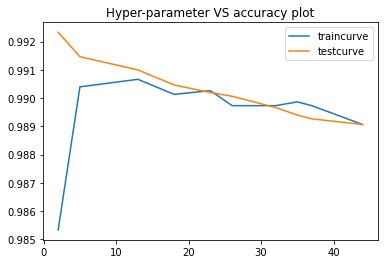

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh=KNeighborsClassifier()
params_range= 50 #defining the range 
folds= 3 # defining the number of folds, which divides the data equally (data/folds)

# the variables are from the return in RandomSearchCV function, which is nothing but printing 
# instead of printing in the function cell, writing seperately. Don't confuse with it
# calling this function, inthis way it will prints all stamentes which defined in the function of RandomSearchCV

testscores,trainscores,params=RandomSearchCV(X_train,y_train,neigh,params_range,folds) 

#print("test_scores: ",test_scores)  #which is not required
#print("\ntestscores: ",testscores)
#print("\ntrainscores: ",train_scores)
#print("\nparams: ",params)


plt.plot(params["n_neighbors"],trainscores,label="traincurve")
plt.plot(params["n_neighbors"],testscores,label="testcurve")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


### Decision Boundary

In [8]:
#applied Roots --- Assignment_4_Reference
# https://www.kaggle.com/bhushanyadav07/implementing-custom-randomsearchcv/notebook

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    print("shape of xx: ",xx.shape) #checking the shape
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("shape of Z before reshape: ",Z.shape) #checking the shape
    
    Z = Z.reshape(xx.shape)
    print("shape of Z after reshape: ",Z.shape) #checking the shape

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

shape of xx:  (444, 579)
shape of Z before reshape:  (257076,)
shape of Z after reshape:  (444, 579)


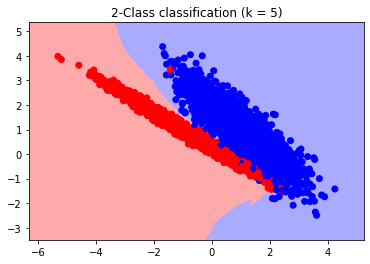

In [12]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 5) # k values are defining
neigh.fit(X_train, y_train) # 
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)  #calling the function for making decision boundary



shape of xx:  (444, 579)
shape of Z before reshape:  (257076,)
shape of Z after reshape:  (444, 579)


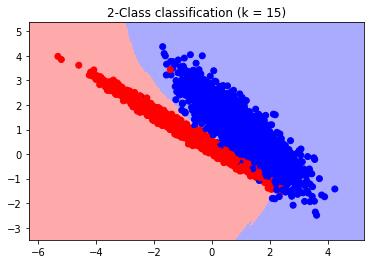

In [10]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 15) # k values are defining
neigh.fit(X_train, y_train) # 
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)  #calling the function for making decision boundary



shape of xx:  (444, 579)
shape of Z before reshape:  (257076,)
shape of Z after reshape:  (444, 579)


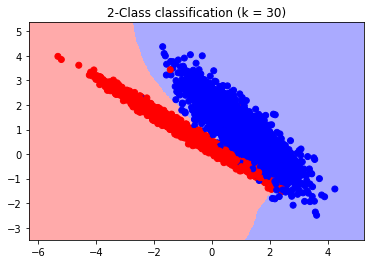

In [11]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)